AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  D 		  R
-------------------------------------
| 5.0 		 0.51 		 0.89 |
| 5.0 		 0.95 		 0.02 |
| 5.0 		 0.1 		 0.82 |
| 5.0 		 0.65 		 0.22 |
| 5.0 		 0.33 		 0.28 |
| 5.0 		 0.39 		 0.85 |
| 5.0 		 0.47 		 0.09 |
| 5.0 		 0.39 		 0.32 |
| 5.0 		 0.41 		 0.94 |
| 5.0 		 0.29 		 0.14 |
| 5.0 		 0.22 		 0.41 |
| 5.0 		 0.17 		 0.26 |
| 5.0 		 0.75 		 0.8 |
| 5.0 		 0.46 		 0.8 |
| 5.0 		 0.26 		 0.56 |
| 5.0 		 0.25 		 0.5 |
| 5.0 		 0.17 		 0.78 |
| 5.0 		 0.04 		 0.45 |
| 5.0 		 0.0 		 0.11 |
-------------------------------------
The s.d. of M is: 0.0
The s.d. of D is: 0.31
The s.d. of R is: 0.29
-------------------------------------
The mean of M is: 5.0
The mean of D is: 0.5
The mean of R is: 0.47
-------------------------------------


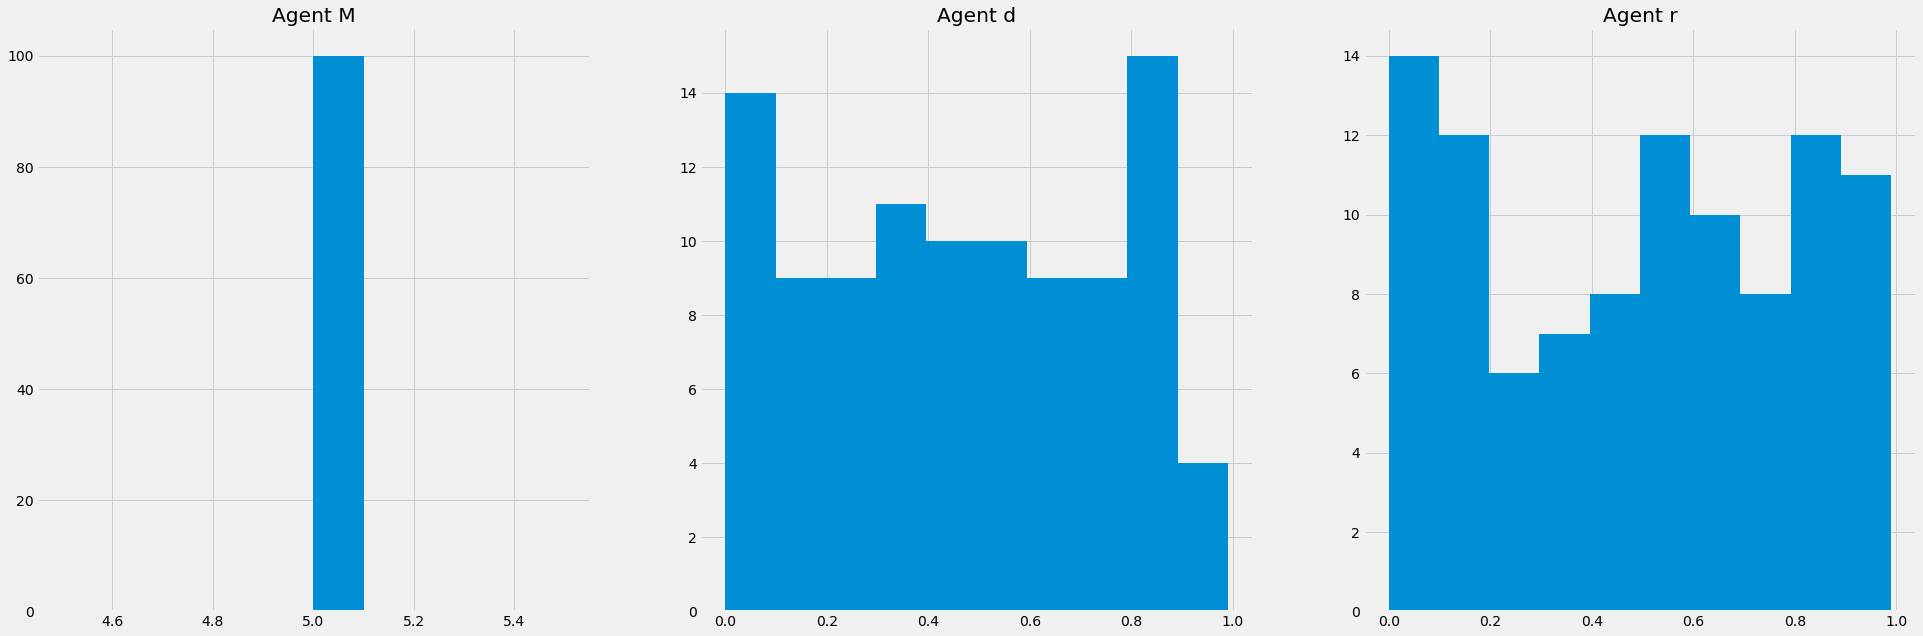

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 7.0, Temptation: 11.4, Sucker: 0, Punishment: 4.4
Agent 1 playing Agent 0: Reward: 4.8, Temptation: 5.0, Sucker: 0, Punishment: 0.1
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 7.0, Temptation: 11.4, Sucker: 0, Punishment: 4.4
Agent 2 playing Agent 0: Reward: 4.6, Temptation: 8.7, Sucker: 0, Punishment: 4.1
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 7.0, Temptation: 11.4, Sucker: 0, Punishment: 4.4
Agent 3 playing Agent 0: Reward: 4.4, Temptation: 5.4, Sucker: 0, Punishment: 1.1
____________________________________________________________________________________________________
Agent 0 playing Agent 4: Reward: 7.0, Temptation: 11.4, Sucker: 0, Punishment: 4.4
Agent 4 playing Ag

No handles with labels found to put in legend.


    S.D.  Counts
0    0.5     278
1    0.6     268
2    0.7     243
3    0.8     234
4    0.9     207
5    1.0     191
6    1.1     178
7    1.2     140
8    1.3     130
9    1.4     106
10   1.5      99
11   1.6     116
12   1.7      91
13   1.8      81
14   1.9      58
15   2.0      37
16   2.1      24
17   2.2      18
18   2.3       7
19   2.4       4
20   2.5       4
21   2.6       3
22   2.7       0
23   2.8       0
24   2.9       0
25   3.0       0


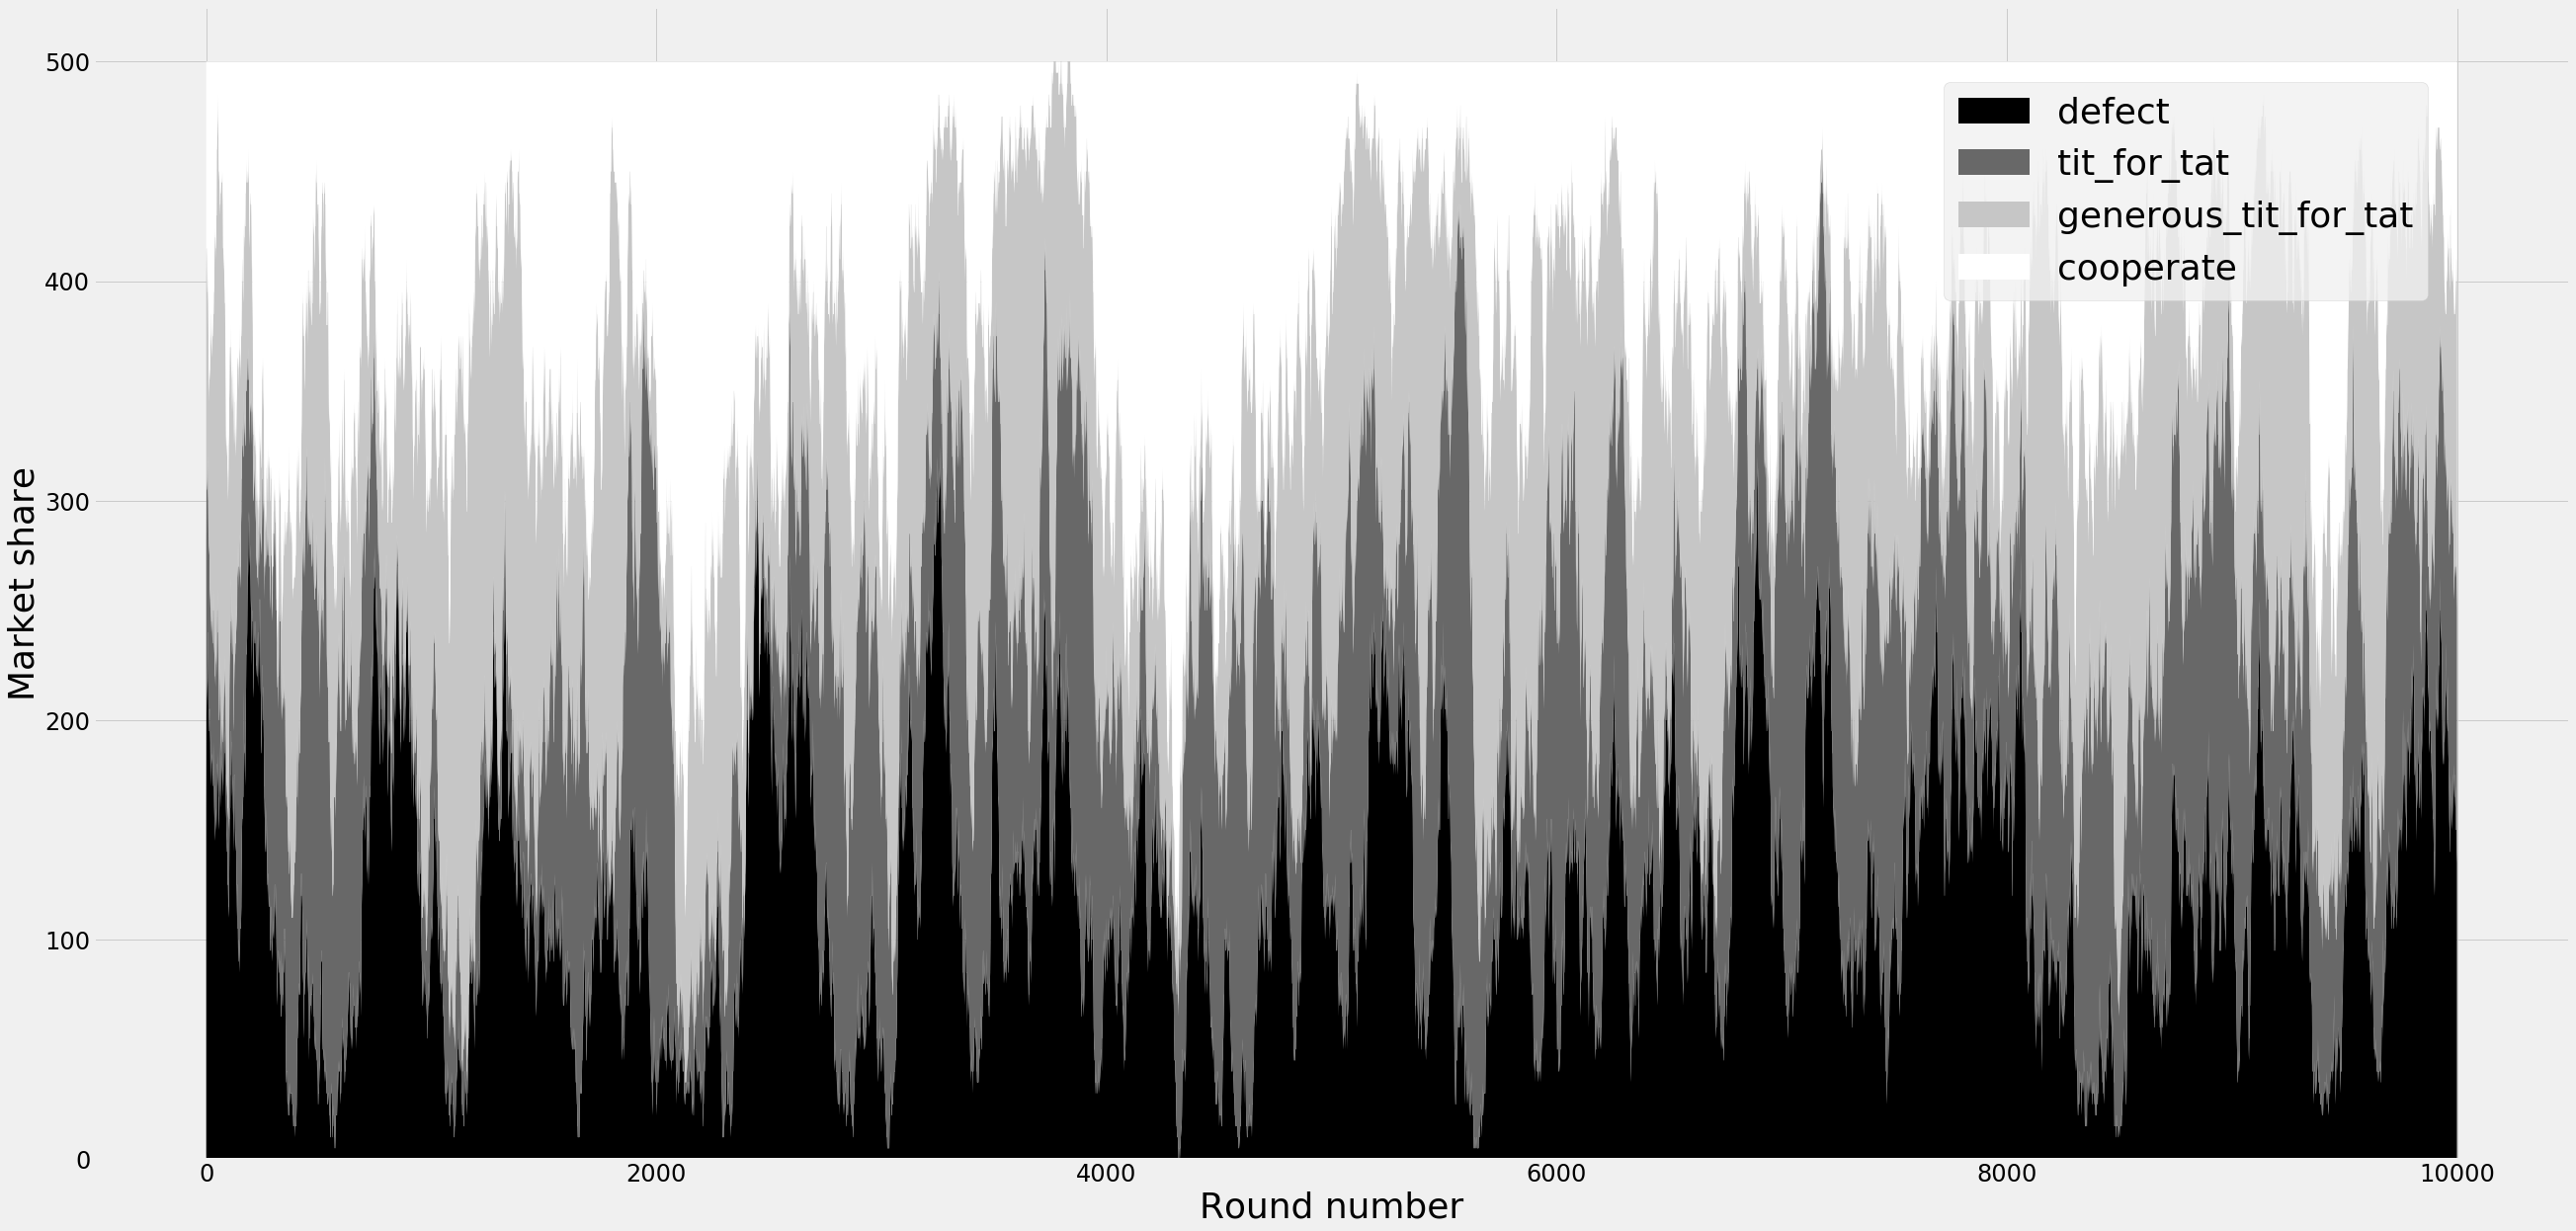

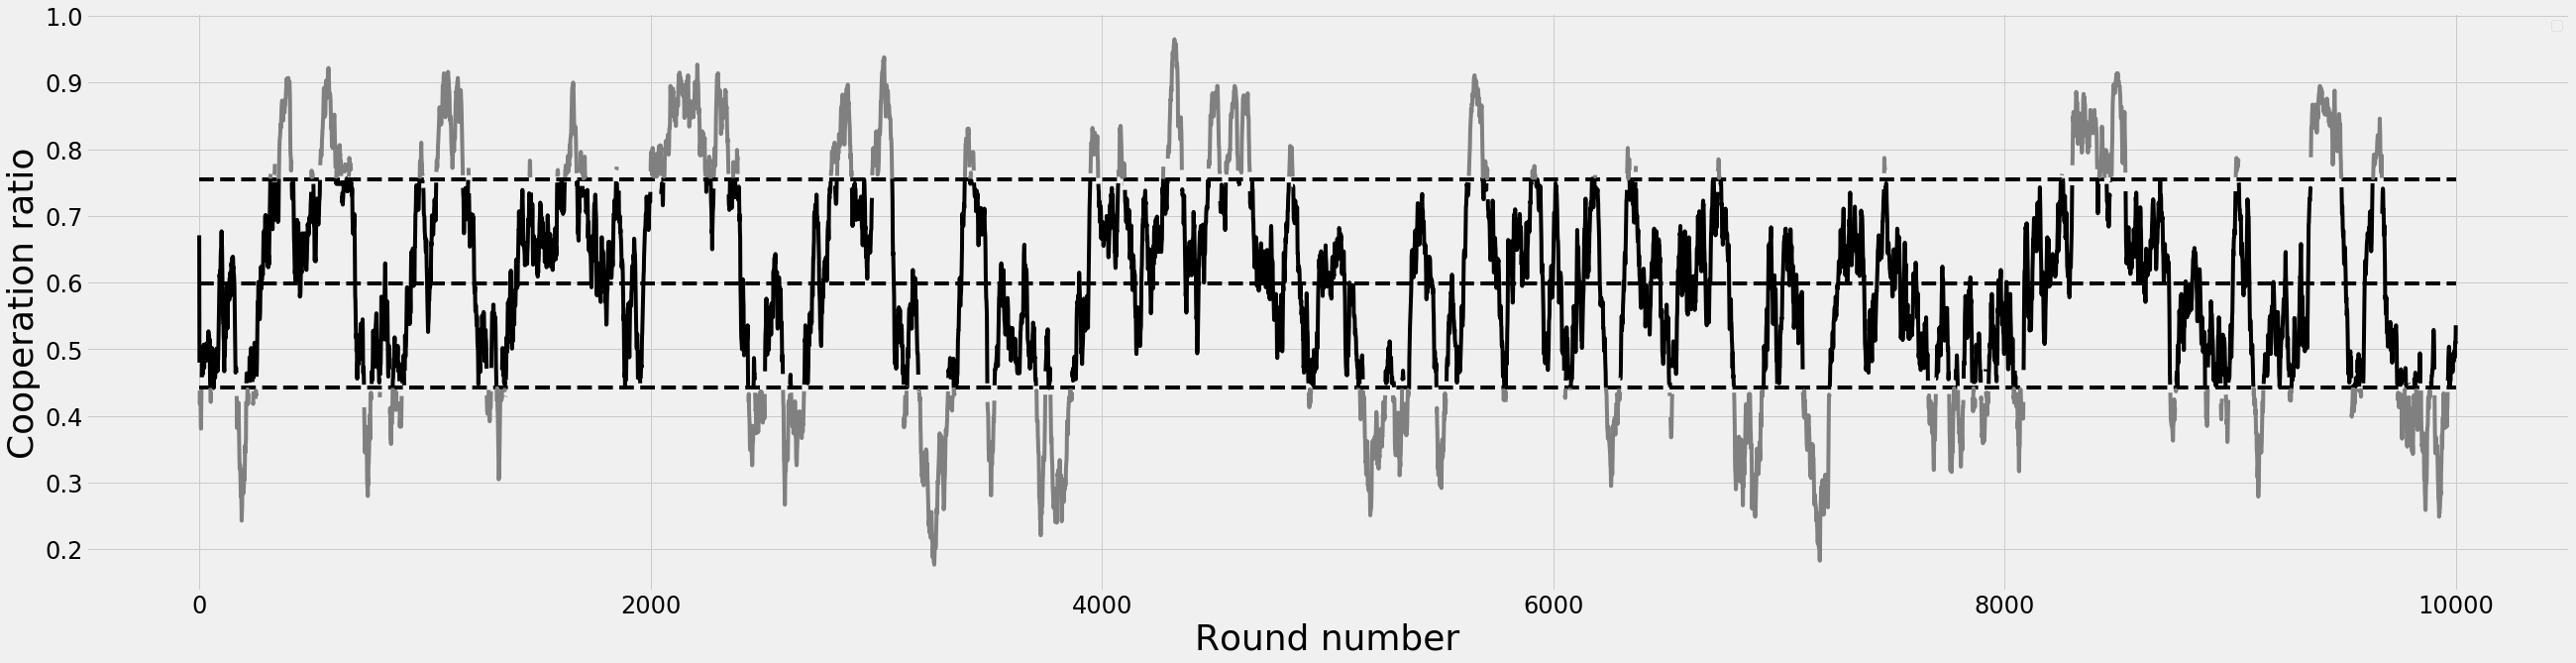

In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 32
np.random.seed(seed)

tour_type = "hetero_dr_sd_max"
M = [5, 1/10000]
R = [0.4, 1.25]
D = [0.3, 1.25]

agents = get_agents(homogenous = False, M = M, R = R, D = D)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("data/outliers/" + str(seed) + "_outlier_counts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, seed = str(seed))